In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import warnings

In [5]:
plt.style.use('seaborn')
warnings.filterwarnings('ignore')

## Load Datasets

In [6]:
names = ['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class']

In [7]:
df_diabetes = pd.read_csv('diabetes.csv', names=names)
df_diabetes.head()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
print('Total data:', df_diabetes.shape[0])
print('Total features:', df_diabetes.shape[1])

Total data: 768
Total features: 9


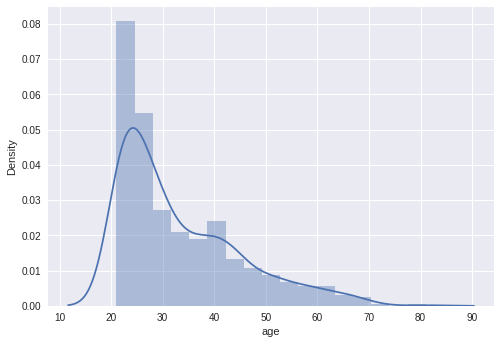

In [9]:
sns.distplot(df_diabetes['age'])

In [10]:
df_diabetes.describe()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


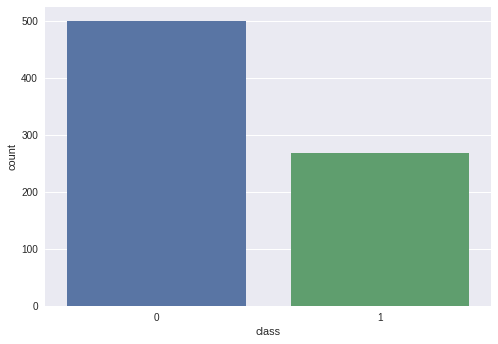

In [11]:
sns.countplot(df_diabetes['class'])

## Pre-Processing

In [12]:
features = df_diabetes.values[:,:8]
labels = df_diabetes.values[:,8]

In [13]:
ms = MinMaxScaler()

In [14]:
ms_features = ms.fit_transform(features)

## Split Datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ms_features, labels, test_size=0.2, random_state=20)

## Machine Learning

**RFC**

In [ ]:
rfc = RandomForestClassifier(random_state=20)
params = {'n_estimators' : [50,100,200,500],
          'criterion' : ['gini', 'entropy', 'log_loss']}

In [ ]:
gscv = GridSearchCV(rfc, params)

In [ ]:
gscv.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=20),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [50, 100, 200, 500]})

In [ ]:
print("Validation Accuracy: ", np.round(gscv.score(X_test, y_test)*100,2), "%")

Validation Accuracy:  77.27 %


In [ ]:
print(gscv.best_params_)

{'criterion': 'entropy', 'n_estimators': 50}


## Deep Learning

In [ ]:
# define the keras sequential model
model = Sequential()

In [ ]:
model.add(Dense(12, input_dim=8, activation='relu')) # input layer + 1st hidden layer
model.add(Dense(8, activation='relu')) # 2nd hidden layer 
model.add(Dense(1, activation='sigmoid')) # output layer

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


## Compile Model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
mc = ModelCheckpoint(filepath="diabetes_model.h5", monitor="val_accuracy", mode="max", save_best_only=True, verbose=1)

## Train Model

In [ ]:
# fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=8, callbacks=[mc])

Epoch 1/200
 1/20 [>.............................] - ETA: 15s - loss: 0.7193 - accuracy: 0.5000
Epoch 1: val_accuracy improved from -inf to 0.65584, saving model to diabetes_model.h5
20/20 [==============================] - 2s 46ms/step - loss: 0.6730 - accuracy: 0.6498 - val_loss: 0.6696 - val_accuracy: 0.6558
Epoch 2/200
 1/20 [>.............................] - ETA: 0s - loss: 0.6981 - accuracy: 0.5312
Epoch 2: val_accuracy did not improve from 0.65584
20/20 [==============================] - 0s 4ms/step - loss: 0.6694 - accuracy: 0.6498 - val_loss: 0.6677 - val_accuracy: 0.6558
Epoch 3/200
 1/20 [>.............................] - ETA: 0s - loss: 0.6338 - accuracy: 0.7500
Epoch 3: val_accuracy did not improve from 0.65584
20/20 [==============================] - 0s 4ms/step - loss: 0.6664 - accuracy: 0.6498 - val_loss: 0.6649 - val_accuracy: 0.6558
Epoch 4/200
 1/20 [>.............................] - ETA: 0s - loss: 0.6475 - accuracy: 0.6875
Epoch 4: val_accuracy did not improve from

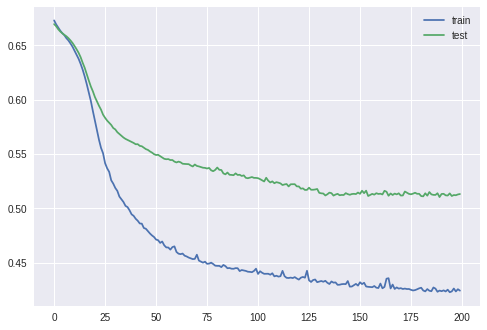

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

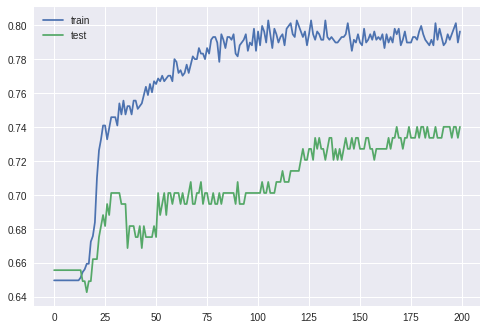

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

## Evaluate Model

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f} %')

Accuracy: 74.03 %


In [ ]:
h5model = load_model('diabetes_model.h5')

In [ ]:
# evaluate the keras model
_, accuracy = h5model.evaluate(X_test, y_test, verbose=False)
print(f'BEST Model Accuracy: {accuracy*100:.2f} %')

BEST Model Accuracy: 74.03 %


## Cross Validation

In [15]:
kfold = StratifiedKFold()
scaled_model = []
scaled_model2 = []
regular_model = []
regular_model2 = []

In [ ]:
for train_index, test_index in kfold.split(features, labels):
  x_train, x_test, y_train, y_test = features[train_index], features[test_index], \
                                      labels[train_index], labels[test_index]

  model = Sequential()
  model.add(Dense(12, input_dim=8, activation='relu')) # input layer + 1st hidden layer
  model.add(Dense(8, activation='relu')) # 2nd hidden layer 
  model.add(Dense(1, activation='sigmoid')) # output layer
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=8)
  regular_model.append(model.evaluate(x_test, y_test)[1])

In [ ]:
for train_index, test_index in kfold.split(features, labels):
  x_train, x_test, y_train, y_test = features[train_index], features[test_index], \
                                      labels[train_index], labels[test_index]

  model = Sequential()
  model.add(Dense(12, input_dim=8, activation='relu')) # input layer + 1st hidden layer
  model.add(Dense(8, activation='relu')) # 2nd hidden layer 
  model.add(Dense(1, activation='sigmoid')) # output layer
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=8)
  regular_model2.append(model.evaluate(x_test, y_test)[1])

In [ ]:
for train_index, test_index in kfold.split(ms_features, labels):
  x_train, x_test, y_train, y_test = ms_features[train_index], ms_features[test_index], \
                                      labels[train_index], labels[test_index]

  model = Sequential()
  model.add(Dense(12, input_dim=8, activation='relu')) # input layer + 1st hidden layer
  model.add(Dense(8, activation='relu')) # 2nd hidden layer 
  model.add(Dense(1, activation='sigmoid')) # output layer
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=8)
  scaled_model.append(model.evaluate(x_test, y_test)[1])

In [ ]:
for train_index, test_index in kfold.split(ms_features, labels):
  x_train, x_test, y_train, y_test = ms_features[train_index], ms_features[test_index], \
                                      labels[train_index], labels[test_index]

  model = Sequential()
  model.add(Dense(12, input_dim=8, activation='relu')) # input layer + 1st hidden layer
  model.add(Dense(8, activation='relu')) # 2nd hidden layer 
  model.add(Dense(1, activation='sigmoid')) # output layer
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=8)
  scaled_model2.append(model.evaluate(x_test, y_test)[1])

In [21]:
print(regular_model)
print(regular_model2)
print(scaled_model)
print(scaled_model2)

[0.6818181872367859, 0.649350643157959, 0.7727272510528564, 0.7320261597633362, 0.7777777910232544]
[0.6688311696052551, 0.7337662577629089, 0.7857142686843872, 0.7320261597633362, 0.6993464231491089]
[0.7792207598686218, 0.7272727489471436, 0.7402597665786743, 0.8235294222831726, 0.7712418437004089]
[0.7597402334213257, 0.7402597665786743, 0.7662337422370911, 0.8235294222831726, 0.758169949054718]


In [1]:
regular_model = [0.6818181872367859, 0.649350643157959, 0.7727272510528564, 0.7320261597633362, 0.7777777910232544]
regular_model2 = [0.6688311696052551, 0.7337662577629089, 0.7857142686843872, 0.7320261597633362, 0.6993464231491089]
scaled_model = [0.7792207598686218, 0.7272727489471436, 0.7402597665786743, 0.8235294222831726, 0.7712418437004089]
scaled_model2 = [0.7597402334213257, 0.7402597665786743, 0.7662337422370911, 0.8235294222831726, 0.758169949054718]

In [6]:
import numpy as np

regular_res = regular_model + regular_model2
scaled_res = scaled_model + scaled_model2

regular_acc = np.mean(regular_res) * 100
scaled_acc = np.mean(scaled_res) * 100

print('Average accuracy without Scaling: ', np.round(regular_acc, 2))
print('Average accuracy with Scaling: ', np.round(scaled_acc, 2))

Average accuracy without Scaling:  72.33
Average accuracy with Scaling:  76.89


MinMaxScaler helps reduce the scaling work of the model, so it doesn't experience a great loss at the first epoch, it also helps the model to reach a slightly higher accuracy. so to conclude, it's better to scale than sorry.